In [7]:
#before running this please change the RUNTIME to GPU (Runtime -> Change runtime type -> set harware accelarotor as GPU)
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Note : Use the drive link for the processed dataset

In [8]:
#Note : only needed when you have to download the processed data to the environment
#download and unzip the data from google drive Colab environment
from google_drive_downloader import GoogleDriveDownloader as gdd
#use only file id of the link
#Note: Below link is just an example, Not an actual link. Actual Links are in ReadMe file
#https://drive.google.com/file/d/1ubvKLzBDe5i1acxgGUK6ObeNBYCKUS07/view?usp=sharing
url = '1ubvKLzBDe5i1acxgGUK6ObeNBYCKUS07'
gdd.download_file_from_google_drive(file_id = url,dest_path='./data.zip',unzip=True)


Unzipping...

/usr/local/lib/python3.10/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "1ubvKLzBDe5i1acxgGUK6ObeNBYCKUS07" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


In [9]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=0d94e910c2f6d92023d7bdd4f6cbab110bccf1674b0ca8711505911a60bd8b27
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [10]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('/content/drive/My Drive/Face_only_data1/*.mp4')

print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 302
['/content/drive/My Drive/Face_only_data1/rmuxlgsedw.mp4', '/content/drive/My Drive/Face_only_data1/bemkbovwsz.mp4', '/content/drive/My Drive/Face_only_data1/baiyzipjbr.mp4', '/content/drive/My Drive/Face_only_data1/aiuimrebtg.mp4', '/content/drive/My Drive/Face_only_data1/acryukkddn.mp4', '/content/drive/My Drive/Face_only_data1/lnjkpdviqb.mp4', '/content/drive/My Drive/Face_only_data1/birmbtezni.mp4', '/content/drive/My Drive/Face_only_data1/srfefmyjvt.mp4', '/content/drive/My Drive/Face_only_data1/asdzplbhnm.mp4', '/content/drive/My Drive/Face_only_data1/prmwoaeeng.mp4', '/content/drive/My Drive/Face_only_data1/rmufsuogzn.mp4', '/content/drive/My Drive/Face_only_data1/bxdhnnffvw.mp4', '/content/drive/My Drive/Face_only_data1/atzwrsivnb.mp4', '/content/drive/My Drive/Face_only_data1/bbnesewcot.mp4', '/content/drive/My Drive/Face_only_data1/bnitzihcqs.mp4', '/content/drive/My Drive/Face_only_data1/bmhghysucl.mp4', '/content/drive/My Drive/Face_only_data1/biatm

In [11]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/content/drive/My Drive/Face_only_data1/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 147, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 147, 148, 148, 148, 148, 148, 148, 118, 148, 148, 148, 148, 148, 148, 117, 148, 104, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 115, 148, 148, 148, 148, 148, 148, 148, 148, 127, 148, 148, 148, 148, 148, 148, 148, 148, 148, 139, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 147, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 141, 148, 148, 146, 148, 148, 114, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 126, 148, 148, 148, 148, 148, 148, 141, 148, 146, 148, 148, 148, 148, 148, 148, 132, 148, 148, 148, 148, 148, 148, 148, 148, 148, 146, 148, 148, 148, 148, 148, 148, 147, 14

In [12]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        print(temp_video)
         # Try to get the label from the CSV file
        try:
            label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]), 1]
            if label == 'FAKE':
                label = 0
            if label == 'REAL':
                label = 1
        except IndexError:
            print("Label not found for video: ", temp_video)
            # delete the video file if the label is not found
            os.remove(video_path)
            return None, None

        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(img):
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.axis('off')
    plt.show()

In [13]:
#count the number of fake and real videos
import os
import pandas as pd

def number_of_real_and_fake_videos(data_list):
    header_list = ["file", "label"]
    lab = pd.read_csv('/content/drive/My Drive/Gobal_metadata.csv', names=header_list)
    fake = 0
    real = 0
    for i in data_list:
        temp_video = i.split('/')[-1]
        label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if label == 'FAKE':
            fake += 1
        if label == 'REAL':
            real += 1
    return real, fake

train :  238
test :  60
                 file label
0             000.mp4  REAL
1         000_003.mp4  FAKE
2             001.mp4  REAL
3         001_870.mp4  FAKE
4             002.mp4  REAL
...               ...   ...
23181  ybbrkacebd.mp4  REAL
23182  ybnucgidtu.mp4  REAL
23183  yexeazbqig.mp4  REAL
23184  yhylappzid.mp4  REAL
23185  yljecirelf.mp4  REAL

[23186 rows x 2 columns]
yexeazbqig.mp4


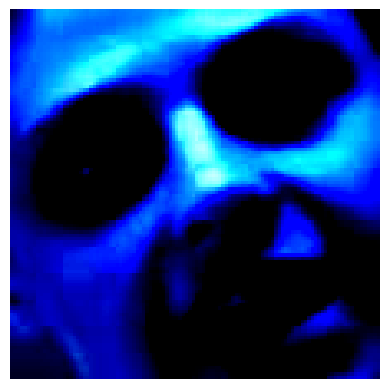

In [14]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import os

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/My Drive/Gobal_metadata.csv',names=header_list)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
train_videos,valid_videos = train_test_split(video_files,test_size = 0.2)
#print(train_videos)

#print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])
#print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])


train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
#print(train_loader)
print(labels)


image,label = train_data[1]
im_plot(image[0,:,:,:])


In [15]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnet50(weights='ResNet50_Weights.DEFAULT')#Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [16]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 433MB/s]


model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))


In [17]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1) 
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [18]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [19]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

Streaming output truncated to the last 5000 lines.
qltdvyiclt.mp4
prmwoaeeng.mp4
ucthmsajay.mp4
mdosrinpqb.mp4
calhtslbzf.mp4
alnkzqihau.mp4
[Epoch 4/20] [Batch 21 / 60] [Loss: 0.577400, Acc: 72.73%]onbgbghesu.mp4
olheajbvle.mp4
fzvpbrzssi.mp4
aassnaulhq.mp4
psjfwjzrrh.mp4
rojqhigadj.mp4
kqlvggiqee.mp4
arvqhnzltg.mp4
[Epoch 4/20] [Batch 23 / 60] [Loss: 0.569035, Acc: 73.96%]prdrkaxeob.mp4
xkfliqnmwt.mp4
abxtkdjyru.mp4
atrteuctxr.mp4
wcqvzujamg.mp4
apzckowxpy.mp4
asdzplbhnm.mp4
jnjvuwglre.mp4
[Epoch 4/20] [Batch 25 / 60] [Loss: 0.557091, Acc: 75.00%]bdpwzkrofr.mp4
xjabnijtoe.mp4
cefpmcqwex.mp4
wfzjxzhdkj.mp4
baiyzipjbr.mp4
avznxuwvbx.mp4
vtunvalyji.mp4
zzcrzuecap.mp4
[Epoch 4/20] [Batch 27 / 60] [Loss: 0.560540, Acc: 75.00%]arkwqyuthh.mp4
yexeazbqig.mp4
nweufafotd.mp4
pjasxlfgbf.mp4
awfddrmdst.mp4
fopjiyxiqd.mp4
bqamrsyvnf.mp4
ngvcqxjhyb.mp4
[Epoch 4/20] [Batch 29 / 60] [Loss: 0.556188, Acc: 75.00%]abebnhqyzv.mp4
asxhhsants.mp4
ybnucgidtu.mp4
aayrffkzxn.mp4
assnxglavo.mp4
wtlxmwrrsv.mp4

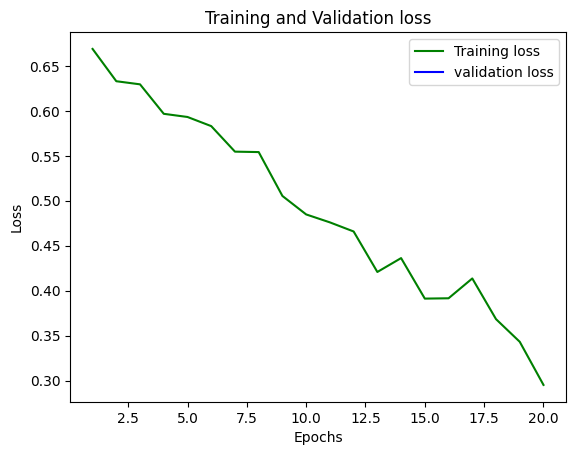

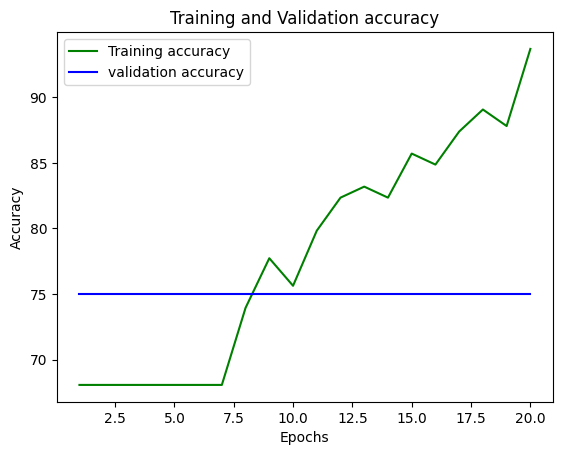

[[45  0]
 [15  0]]
True positive =  45
False positive =  0
False negative =  15
True negative =  0




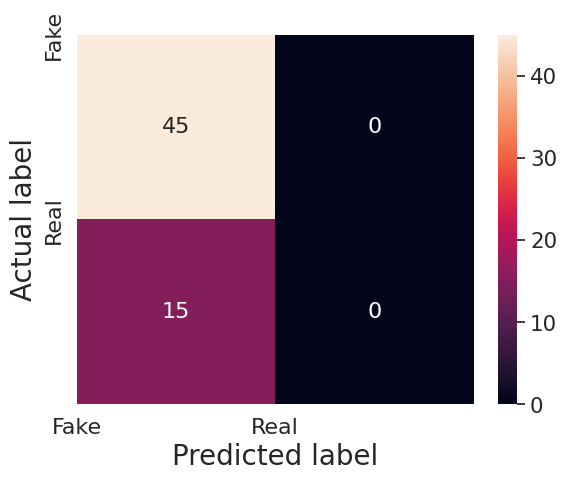

Calculated Accuracy 75.0


In [20]:
from sklearn.metrics import confusion_matrix

# learning rate
lr = 1e-5 # 0.001
# number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight=class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg = []
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1, num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true, pred, tl, t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))

# Calculate confusion matrix
print(confusion_matrix(true, pred))
print_confusion_matrix(true, pred)